# Use case

We are a Health Insurance provider and we want to provide a service that can predict how much a patients charges will be and inform them on the 3 biggest factors that play a role to help them identify ways to cut costs.

In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from potosnail import Stats
from scipy.stats import ttest_ind
import numpy as np

In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/spe301/healthcare-ds/main/insurance2.csv').drop(['Unnamed: 0'], axis='columns')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges,overweight,northeast,northwest,southeast,southwest,sex_int
0,19,female,27.900,0,1,southwest,16884.92400,1,0.0,0.0,0.0,1.0,0
1,18,male,33.770,1,0,southeast,1725.55230,1,0.0,0.0,1.0,0.0,1
2,28,male,33.000,3,0,southeast,4449.46200,1,0.0,0.0,1.0,0.0,1
3,33,male,22.705,0,0,northwest,21984.47061,0,0.0,1.0,0.0,0.0,1
4,32,male,28.880,0,0,northwest,3866.85520,1,0.0,1.0,0.0,0.0,1


# At a glance

Gender

C:\Users\aacjp\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '49.0% female and 51.0% male')

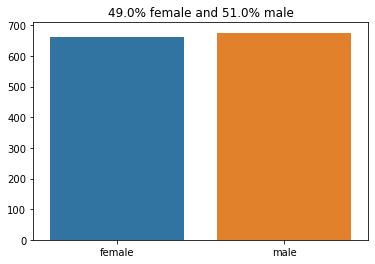

In [7]:
f = len(df.loc[df['sex']=='female'])
m = len(df.loc[df['sex']=='male'])
labels = ['female', 'male']
sns.barplot(labels, [f, m])
plt.title('{}% female and {}% male'.format(round(f/len(df), 2)*100, round(m/len(df), 2)*100))

Age

Text(0.5, 1.0, 'age distribution')

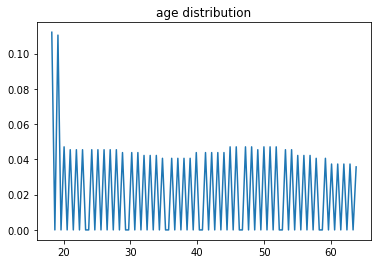

In [11]:
Stats().PDF(df['age'])
plt.title('age distribution')

Charges

Text(0.5, 1.0, 'charges distribution')

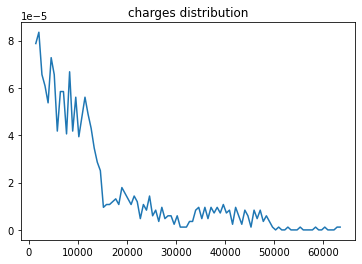

In [13]:
Stats().PDF(df['charges'])
plt.title('charges distribution')

# EDA
1. is the difference between average charges for overweight and not overweight patients statistically signifigant? What about for smokers?
2. What region has the highest charges on average, What can we suspect is the cause?
3. plot a graph showing average charge by number of children.
4. How much of a role does age play in the charges?

In [16]:
n = 100
overweight_sample = df.loc[df['overweight']==1].sample(n)['charges']
normal_sample = df.loc[df['overweight']==0].sample(n)['charges']

In [17]:
ttest_ind(overweight_sample, normal_sample)

Ttest_indResult(statistic=2.356827229820749, pvalue=0.019408122633196537)

In [23]:
n = 100
smoker_sample = df.loc[df['smoker']==1].sample(n)['charges']
nonsmoker_sample = df.loc[df['smoker']==0].sample(n)['charges']
ttest_ind(smoker_sample, nonsmoker_sample)

Ttest_indResult(statistic=16.68275390922206, pvalue=1.3384251952175979e-39)

In [24]:
np.mean(overweight_sample), np.mean(normal_sample)

(13466.5224407, 10157.8147338)

In [25]:
np.mean(smoker_sample), np.mean(nonsmoker_sample)

(31970.12222480001, 8553.376760300001)

Conclusion: charges are signifigantly higher for customers who smoke, being overweight also increases charges.

Reccomendation: We could advise our customers to stop smoking in the interest of cutting costs, losing weight will also help.

<AxesSubplot:>

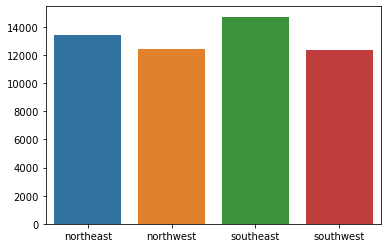

In [30]:
regions = list(np.unique(df['region']))
averages = []
for region in regions:
    averages.append(np.mean(df.loc[df['region']==region]['charges']))
    
sns.barplot(regions, averages)

Conclusion: Although the difference isn't major, the southeast has the highest charges on average. This is probably due to the southeast having a higher obesity rate. 

<AxesSubplot:>

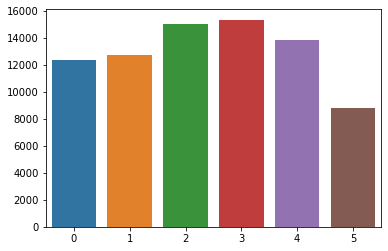

In [32]:
nums = list(np.unique(df['children']))
averages = []
for num in nums:
    averages.append(np.mean(df.loc[df['children']==num]['charges']))
    
sns.barplot(nums, averages)

Conclusion: according to the data, customers with 3 children are charged the highest but customers with 5 children are charged the lowest.

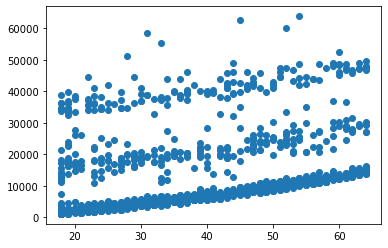

In [33]:
plt.scatter(df['age'], df['charges'])

In [35]:
df.corr()

,age,bmi,children,smoker,charges,overweight,northeast,northwest,southeast,southwest,sex_int
age,1.000000,0.109272,0.042469,-0.025019,0.299008,0.091367,0.002475,-0.000407,-0.011642,0.010016,-0.020856
bmi,0.109272,1.000000,0.012759,0.003750,0.198341,0.658534,-0.138156,-0.135996,0.270025,-0.006205,0.046371
children,0.042469,0.012759,1.000000,0.007673,0.067998,-0.008881,-0.022808,0.024806,-0.023066,0.021914,0.017163
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251,-0.021092,0.002811,-0.036945,0.068498,-0.036945,0.076185
charges,0.299008,0.198341,0.067998,0.787251,1.000000,0.117372,0.006349,-0.039905,0.073982,-0.043210,0.057292
overweight,0.091367,0.658534,-0.008881,-0.021092,0.117372,1.000000,-0.104273,-0.044938,0.113396,0.031428,0.033876
northeast,0.002475,-0.138156,-0.022808,0.002811,0.006349,-0.104273,1.000000,-0.320177,-0.345561,-0.320177,-0.002425
northwest,-0.000407,-0.135996,0.024806,-0.036945,-0.039905,-0.044938,-0.320177,1.000000,-0.346265,-0.320829,-0.011156
southeast,-0.011642,0.270025,-0.023066,0.068498,0.073982,0.113396,-0.345561,-0.346265,1.000000,-0.346265,0.017117
southwest,0.010016,-0.006205,0.021914,-0.036945,-0.043210,0.031428,-0.320177,-0.320829,-0.346265,1.000000,-0.004184
